# Run a Monte Carlo simulation to determine significant overlap of DEGs between multiple brain regions

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load overlap annotation

In [2]:
annot = data.table::fread("../../_m/brainseq_deg_across_tissues_comparison.csv")
annot %>% head(2)

gene_id,ensemblID,gene_name,seqname,gene_type,Caudate,DLPFC,Hippocampus,Dentate Gyrus
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
ENSG00000227232.5,ENSG00000227232,WASH7P,chr1,unprocessed_pseudogene,1,1,1,1
ENSG00000279457.3,ENSG00000279457,FO538757.1,chr1,protein_coding,1,1,1,1


In [3]:
total = dim(annot)[1] ## Unique elements in the list
caudate = dim(filter(annot, Caudate == 1))[1]
dlpfc = dim(filter(annot, DLPFC == 1))[1]
hippocampus = dim(filter(annot, Hippocampus == 1))[1]
gyrus = dim(filter(annot, `Dentate Gyrus` == 1))[1]

## Monte Carlo simulation

### Four brain regions

In [4]:
sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    D=sample(1:total, dlpfc); 
    H=sample(1:total, hippocampus); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(C,D,H,G))))
}))

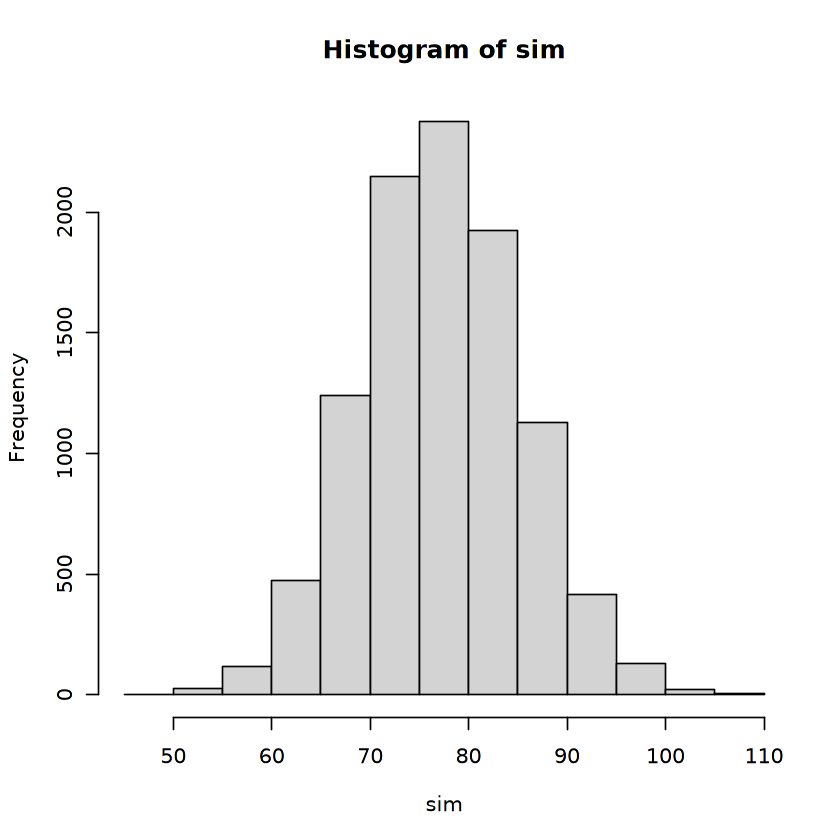

In [5]:
hist(sim)

In [6]:
shared = dim(filter(annot, Caudate == 1, DLPFC == 1, 
                    Hippocampus == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 108"
[1] "The overlap is: 198"
[1] "Enrichment p-value < 1e-04"
[1] "Depletion p-value < 1"


### Three brain regions

#### Caudate vs DLPFC vs Hippocampus

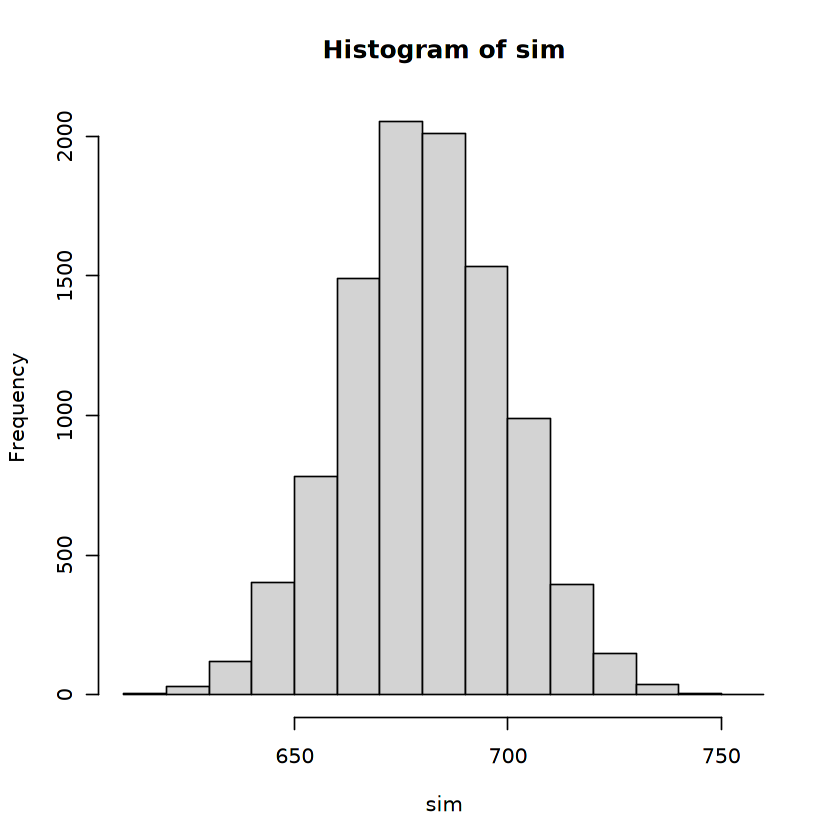

In [7]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, Hippocampus == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    D=sample(1:total, dlpfc); 
    H=sample(1:total, hippocampus); 
    return(length(Reduce(intersect, list(C,D,H))))
}))

hist(sim)

In [8]:
shared = dim(filter(annot, Caudate == 1, DLPFC == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 757"
[1] "The overlap is: 786"
[1] "Enrichment p-value < 1e-04"
[1] "Depletion p-value < 1"


#### Caudate vs DLPFC vs Dentate Gyrus

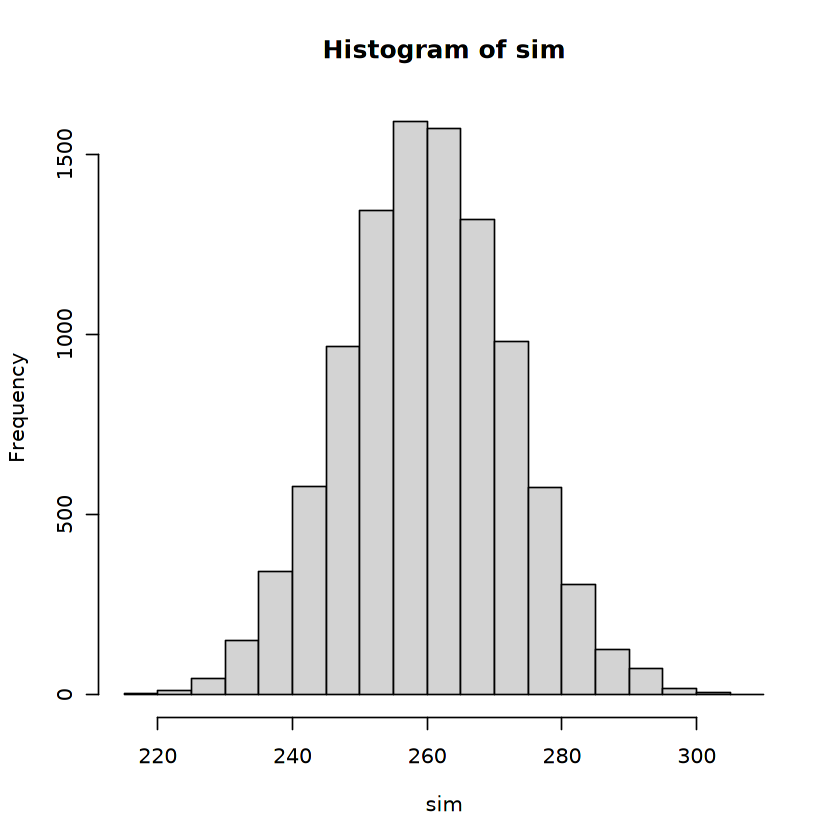

In [9]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    D=sample(1:total, dlpfc); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(C,D,G))))
}))

hist(sim)

In [10]:
shared = dim(filter(annot, Caudate == 1, DLPFC == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 306"
[1] "The overlap is: 225"
[1] "Enrichment p-value < 1"
[1] "Depletion p-value < 0.0015"


#### Caudate vs Hippocampus vs Dentate Gyrus

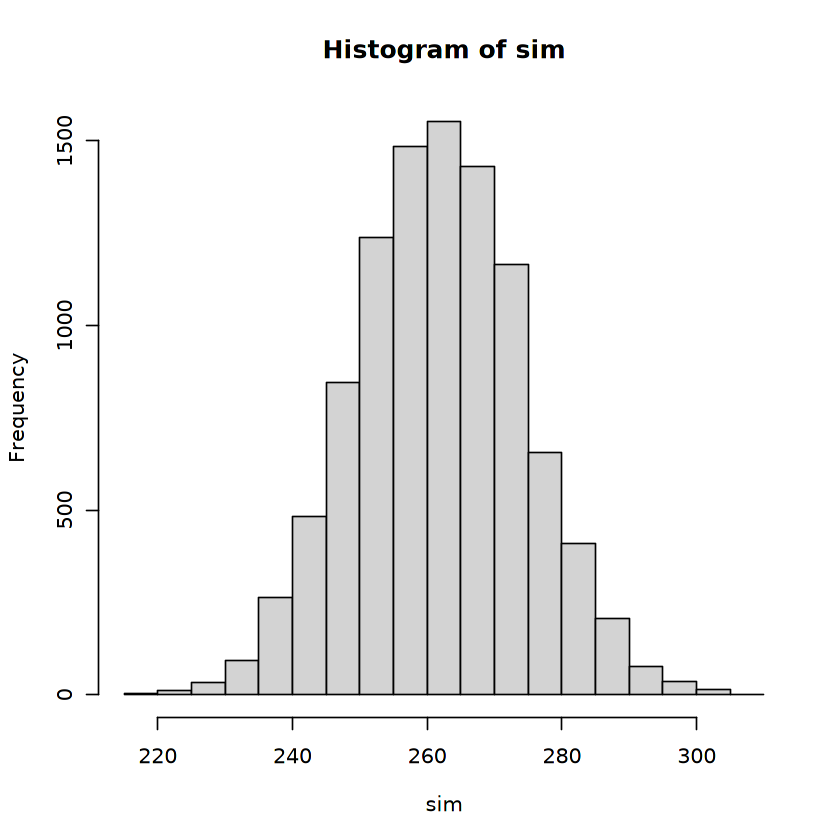

In [11]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, Hippocampus == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    H=sample(1:total, hippocampus); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(C,H,G))))
}))

hist(sim)

In [12]:
shared = dim(filter(annot, Caudate == 1, `Dentate Gyrus` == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 308"
[1] "The overlap is: 232"
[1] "Enrichment p-value < 0.99"
[1] "Depletion p-value < 0.0074"


#### DLPFC vs Hippocampus vs Dentate Gyrus

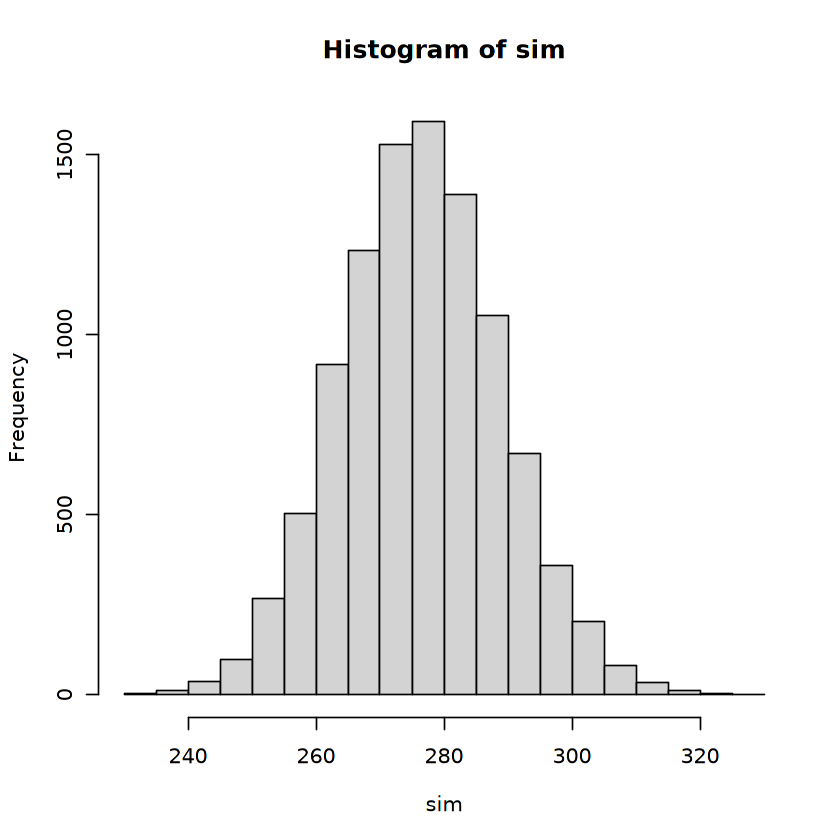

In [13]:
total = Reduce(union, list(filter(annot, Hippocampus == 1)$gene_id, 
                           filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    D=sample(1:total, dlpfc); 
    H=sample(1:total, hippocampus); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(D,H,G))))
}))

hist(sim)

In [14]:
shared = dim(filter(annot, `Dentate Gyrus` == 1, DLPFC == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 329"
[1] "The overlap is: 264"
[1] "Enrichment p-value < 0.86"
[1] "Depletion p-value < 0.16"


### Two brain regions

#### Caudate vs DLPFC

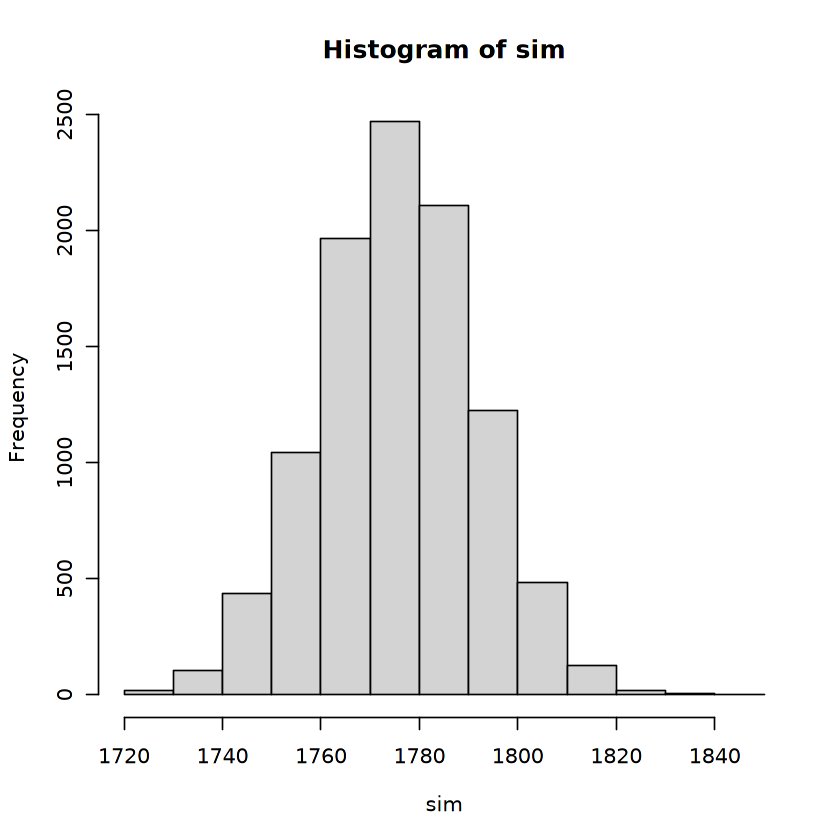

In [15]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, DLPFC == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    D=sample(1:total, dlpfc); 
    return(length(Reduce(intersect, list(C,D))))
}))

hist(sim)

In [16]:
shared = dim(filter(annot, Caudate == 1, DLPFC == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 1848"
[1] "The overlap is: 1115"
[1] "Enrichment p-value < 1"
[1] "Depletion p-value < 1e-04"


#### Caudate vs Hippocampus

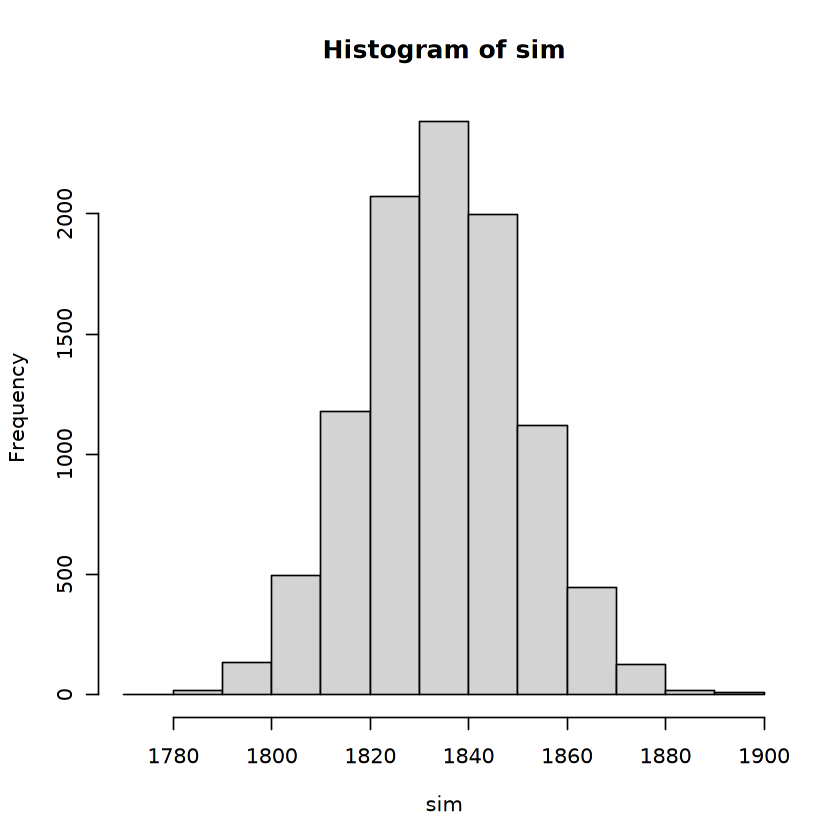

In [17]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, Hippocampus == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    H=sample(1:total, hippocampus); 
    return(length(Reduce(intersect, list(C,H))))
}))

hist(sim)

In [18]:
shared = dim(filter(annot, Caudate == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 1898"
[1] "The overlap is: 1142"
[1] "Enrichment p-value < 1"
[1] "Depletion p-value < 1e-04"


#### Caudate vs Dentate Gyrus

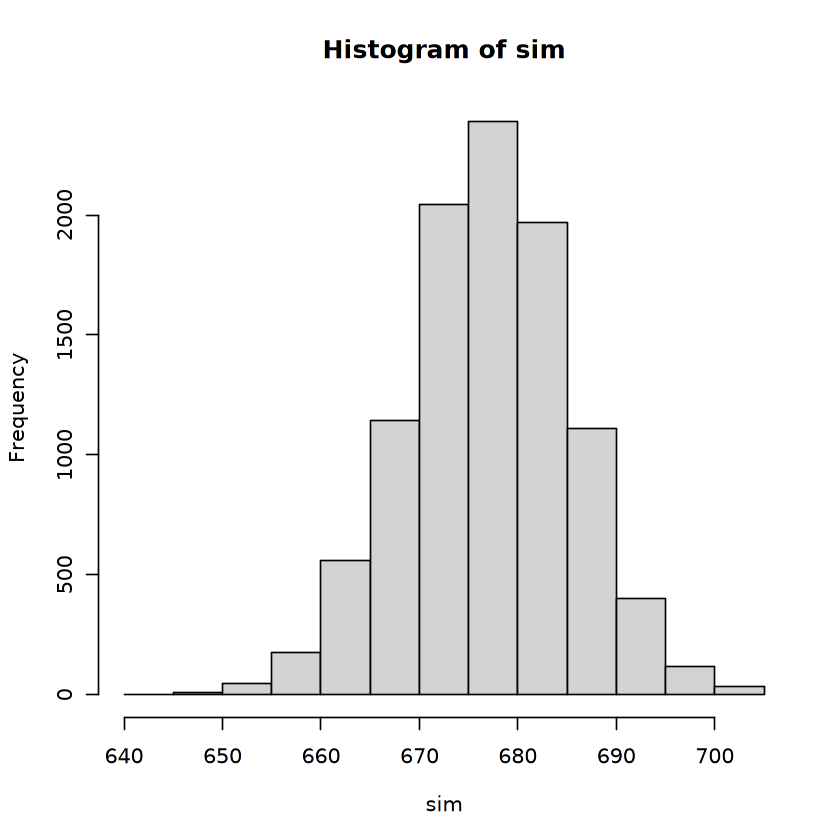

In [19]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(C,G))))
}))

hist(sim)

In [20]:
shared = dim(filter(annot, Caudate == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 705"
[1] "The overlap is: 311"
[1] "Enrichment p-value < 1"
[1] "Depletion p-value < 1e-04"


#### DLPFC vs Hippocampus

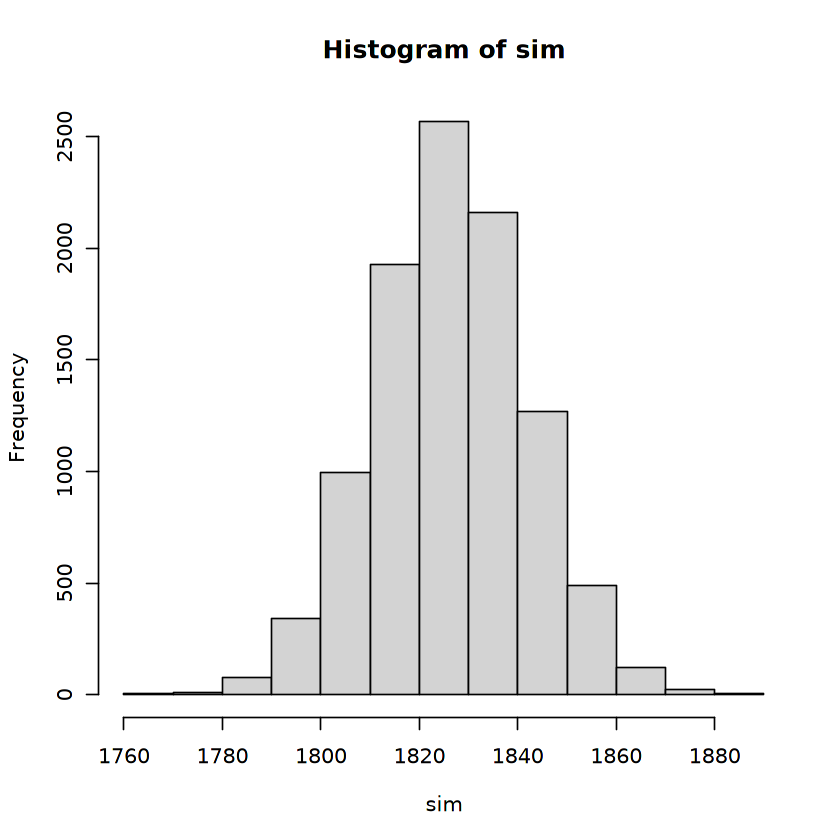

In [21]:
total = Reduce(union, list(filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, Hippocampus == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    D=sample(1:total, dlpfc); 
    H=sample(1:total, hippocampus); 
    return(length(Reduce(intersect, list(D,H))))
}))

hist(sim)

In [22]:
shared = dim(filter(annot, DLPFC == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 1887"
[1] "The overlap is: 1251"
[1] "Enrichment p-value < 1"
[1] "Depletion p-value < 1e-04"


#### DLPFC vs Dentate Gyrus

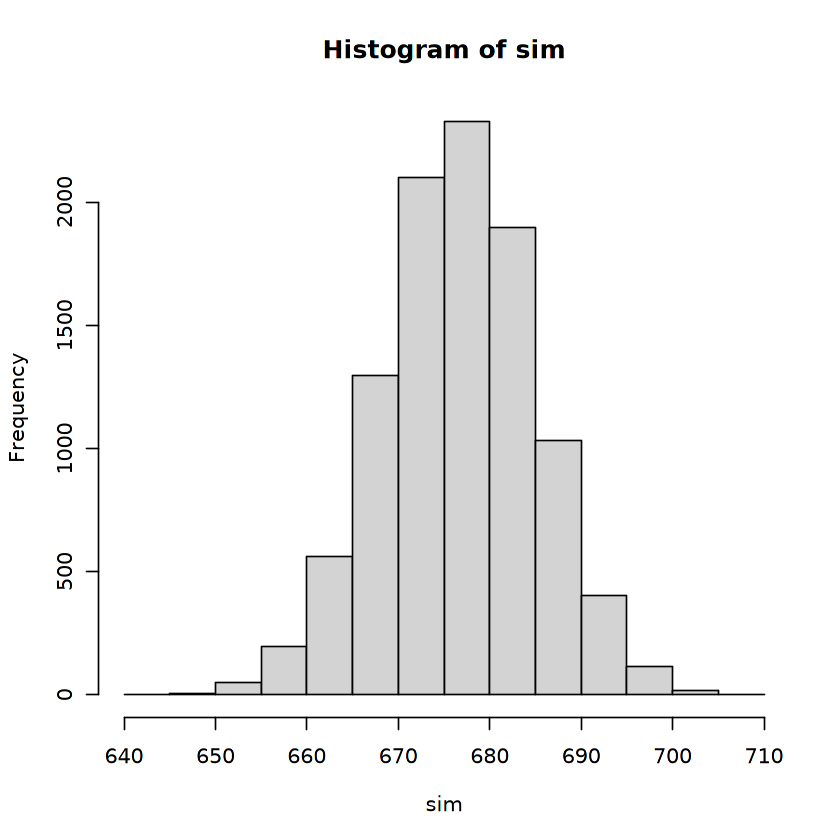

In [23]:
total = Reduce(union, list(filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    D=sample(1:total, dlpfc); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(D,G))))
}))

hist(sim)

In [24]:
shared = dim(filter(annot, DLPFC == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 710"
[1] "The overlap is: 342"
[1] "Enrichment p-value < 1"
[1] "Depletion p-value < 1e-04"


#### Hippocampus vs Dentate Gyrus

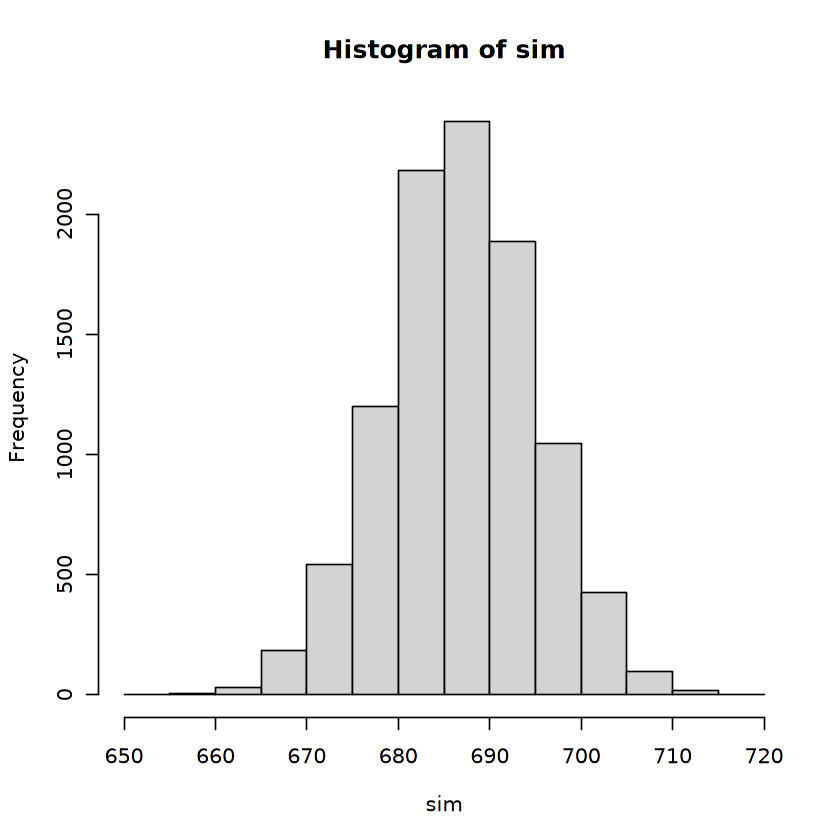

In [25]:
total = Reduce(union, list(filter(annot, Hippocampus == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    H=sample(1:total, hippocampus); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(H,G))))
}))

hist(sim)

In [26]:
shared = dim(filter(annot, Hippocampus == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 717"
[1] "The overlap is: 361"
[1] "Enrichment p-value < 1"
[1] "Depletion p-value < 1e-04"


## Reproducibility Information

In [27]:
print("Reproducibility Information:")
Sys.time()
proc.time()
options(width=120)
sessioninfo::session_info()

[1] "Reproducibility Information:"


[1] "2021-07-12 09:52:06 EDT"

   user  system elapsed 
 79.408   0.490  80.529 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-07-12                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 broom         0.7.8    2021-06-24 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 4.0.2)
 cellranger    1.1.0    2016-07-27 [1] CRAN (R 